# Project: Customer Purchase Analytics Part II: Descriptive Analysis
Author: Wei Chong Ong

## Table of Contents
<ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#preprocessing">Data Preprocessing</a></li>
<li><a href="#segmentation">Customer Segmentation</a></li>
<li><a href="#descriptive">Descriptive Analysis</a></li>
</ul>

### Import Libraries

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import Dataset

In [40]:
df_purchase = pd.read_csv('purchase data.csv')

<a id='eda'></a>
## Exploratory Data Analysis

In [41]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [42]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

<a id='preprocessing'></a>
## Data Preprocessing

### Standardization

In [43]:
# Import scaler model
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [44]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

<a id='segmentation'></a>
## Customer Segmentation

### Principal Components Analysis - PCA

In [45]:
# Import PCA model
pca = pickle.load(open('pca.pickle', 'rb'))

In [46]:
pca_scores = pca.transform(df_purchase_segm_std)

### K-means Clustering with PCA

In [47]:
# Import K-means PCA model
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

In [48]:
# Based on the principal components, use the predict method from KMeans to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(pca_scores)

In [49]:
df_purchase_predictors = df_purchase.copy()

In [50]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

<a id='descriptive'></a>
## Descriptive Analysis

In [51]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [36]:
# Segment Number
temp1 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp1 = temp1.set_index('ID')

# Purchase occasions by customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Visits'})

# Number of purchases per customer ID
temp3 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp3 = temp3.set_index('ID')
temp3 = temp3.rename(columns = {'Incidence': 'N_Purchases'})

df_purchase_descr = temp1.join(temp2).join(temp3)

### Average number of purchases by customer ID per visit
df_purchase_descr['Average_N_Purchases'] = df_purchase_descr['N_Purchases'] / df_purchase_descr['N_Visits']

df_purchase_descr.head()

,Segment,N_Visits,N_Purchases,Average_N_Purchases
ID,,,,
200000001,0,101,9,0.089109
200000002,3,87,11,0.126437
200000003,0,97,10,0.103093
200000004,0,85,11,0.129412
200000005,1,111,13,0.117117


### Segment proportions

In [53]:
# Calculate the proportions of each segment and set the appropriate column name. 
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


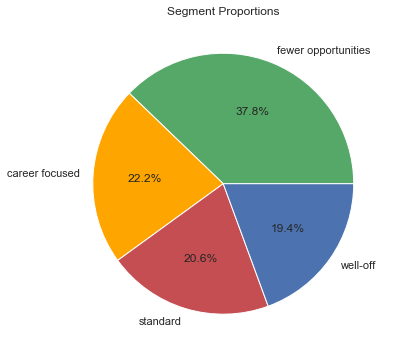

In [57]:
# Plot the segment proportions as a pie chart. 
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['fewer opportunities', 'career focused', 'standard', 'well-off'],
        autopct = '%1.1f%%', 
        colors = ('g', 'orange', 'r', 'b'))
plt.title('Segment Proportions');

In [58]:
# Calculate the mean by the four segments to determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()

In [59]:
# Calculate the standard deviation by segments to determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

### Purchase Occasion

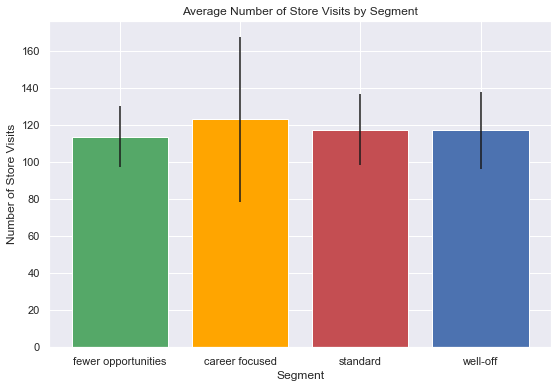

In [62]:
# Plot the average number of store visits for each of the four segments using a bar chart.
# Display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('fewer opportunities', 'career focused', 'standard', 'well-off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('g', 'orange', 'r', 'b'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')
plt.show()

### Number of Purchase

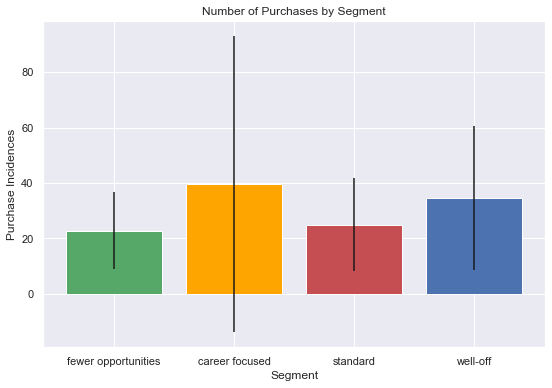

In [63]:
# Display the average number of purchases by segments to understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('fewer opportunities', 'career focused', 'standard', 'well-off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('g', 'orange', 'r', 'b'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')
plt.show()

> **Interpretation:**
- The 'career-focused' segment visits the store and buy products most often. However the standard deviation amongst customers is the highest. This implies that the customers in this segment are at least homogenous, that is least alike when it comes to how often they visit the grocery store and buy products.
- The most homogenous segment appears to be that of the 'fewer-opportunities' segment.

### Average number of purchases

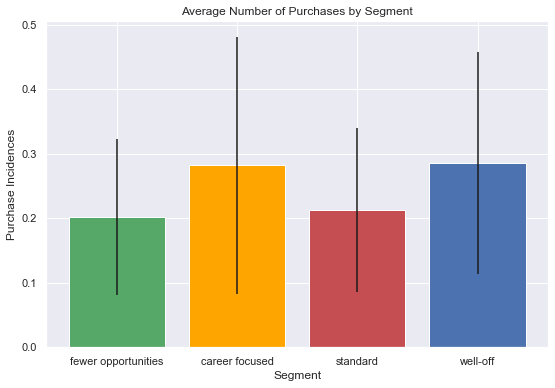

In [65]:
# Display the average number of purchases by segment per visit.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('fewer opportunities', 'career focused', 'standard', 'well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('g', 'orange', 'r', 'b'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')
plt.show()

### Brand Choice

In [66]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [67]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [68]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [69]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

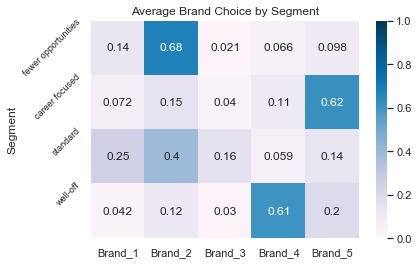

In [70]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['fewer opportunities', 'career focused', 'standard', 'well-off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

> **Interpretation:**
- The five brands are arranged in ascending order of price
- Almost 70% of the 'fewer-opportunities' segment chooses Brand_2 chocolate
- 63% of the 'career-focused' segment buys Brand_5 chocolate which is the most expensive brand. This indicates that people of this segment is looking for some kind of luxury status. This may be an opportunity to raise the price of Brand_5 even further
- The price of the chocolate bars isn't what matters the most to the customers
- The 'standard' segment is the most heterogeneous segment. Try to influence them to try different brands might be a good idea in order to gain actionable insight.

### Revenue

In [78]:
# Revenue for brand 1.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [79]:
# Revenue for brand 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
# Revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [81]:
# Revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [82]:
# Revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [83]:
# Total revenue for each of the segments.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )

# It is interesting to see the size of the segment compared to the revenue they bring.
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'fewer opportunities',
                                                                           1:'career focused',
                                                                           2:'standard',
                                                                           3:'well-off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
fewer opportunities,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
career focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
well-off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194


> **Intepretation:**
- Apparently even though 'career focused' segment is the second largest, it brings the highest revenue. It seems that they are by far the most prominent segment for the store with regard to chocolate candy bars.
- The standard is almost equal in size but it brings less than half that revenue.
- The 'well-off' and the 'fewer-opportunities' segments spend around the same amount of money on chocolate candy bars with the note that the latter is twice the size of the former.

> **Possible marketing strategies:**
- If Brand_3 reduces its price, 'standard' segment could pivot towards it.
- Brand_4 could try cautiously increasing its price as 'well-off' segment seem to be loyal to this brand and not really affected by price. Most of the customers could be retained and reveneu per sale could be increased.